HD127423, 2013-06-01: Assessment of repeat observations
=======================================================
This notebook looks for spectral features of interest in other observatioms similar to HARPS OSETI candidate HD127423.  First we look at all other observations of the candidate star in the HARPS database; then we look at other observations taken on the same night.

Setup and import stuff:

In [45]:
%matplotlib widget

In [46]:
from astroquery.eso import Eso
eso = Eso()
from pathlib import Path
eso_cache_folder = Path(eso.cache_location)
import harpscompare
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

In [47]:
%matplotlib widget

Login if needed.

In [48]:
if not eso.authenticated():
    eso.login(username="goodmanj", store_password=True)

INFO: Authenticating goodmanj on www.eso.org... [astroquery.eso.core]
INFO: Authentication successful! [astroquery.eso.core]


Search the ESO archive for all observations of HD127423.

In [49]:
tbl = eso.query_surveys('HARPS',target="HD127423",box=0.1)
print(tbl)

          ARCFILE            Object  ... REFERENC
--------------------------- -------- ... --------
ADP.2014-09-26T16:55:03.680 HD127423 ...       --
ADP.2014-10-06T10:06:38.740 HD127423 ...       --
ADP.2014-09-18T12:13:05.787 HD127423 ...       --
ADP.2014-09-18T12:16:19.900 HD127423 ...       --
ADP.2014-09-18T12:13:43.670 HD127423 ...       --
ADP.2014-09-18T12:17:20.867 HD127423 ...       --
ADP.2014-09-25T15:35:24.200 HD127423 ...       --
ADP.2014-09-18T12:17:15.700 HD127423 ...       --


A function that converts eso query names into local eso cached filenames.

In [50]:
def cached_filename(file):
    file_no_colon = str(file).replace(":","_")
    return eso_cache_folder/(file_no_colon+".fits")


Look to see if each spectral file is already in the cache.  If not, download it.

In [51]:
specarcfile = tbl['ARCFILE']
fits_specfile_names = []
for file in specarcfile:
    fits_specfile_name = cached_filename(file)
    fits_specfile_names.append(fits_specfile_name)
    if (not fits_specfile_name.exists()):
        print(str(fits_specfile_name)+" to be downloaded")
        eso.retrieve_data(file)
    else:
        print(str(fits_specfile_name)+" exists")

C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-09-26T16_55_03.680.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_06_38.740.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-09-18T12_13_05.787.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-09-18T12_16_19.900.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-09-18T12_13_43.670.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-09-18T12_17_20.867.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-09-25T15_35_24.200.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-09-18T12_17_15.700.fits exists


Look to see if each raw CCD file is already in the cache.  If not, download it.

In [52]:
fits_rawfile_names = []
for file in fits_specfile_names:
    fitsobj = fits.open(file)
    fits_rawfile_name = cached_filename(fitsobj[0].header['PROV1'][:-5])
    fits_rawfile_names.append(fits_rawfile_name)
    if fits_rawfile_name.exists():
        print(str(fits_rawfile_name)+" exists")
    else:
        print(str(fits_rawfile_name)+" to be downloaded")
        harpscompare.download_associated_raw(file,decompress=True)

C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2012-09-13T23_31_29.422.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-06-01T04_16_19.375.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2008-04-22T04_49_50.120.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2008-04-23T07_01_50.027.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2008-04-25T06_50_55.614.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2008-04-21T07_09_51.581.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2011-03-31T08_11_52.115.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2008-04-24T06_51_27.422.fits exists


Doppler shift function

In [53]:
def doppler(wave,v):
    c = 2.998e5 # km/s
    beta = v/c
    return wave*np.sqrt((1-beta)/(1+beta))

Repeat observations of HD127423
-------------------------------
Plot all spectra for HD127423 on the same graph.  All have similar absorption features, but only one (ADP.2014-10-06T10_06_38.740 = HARPS.2013-06-01T04_16_19.375) has an emission line near the candidate wavelength of 5733 angstrom.

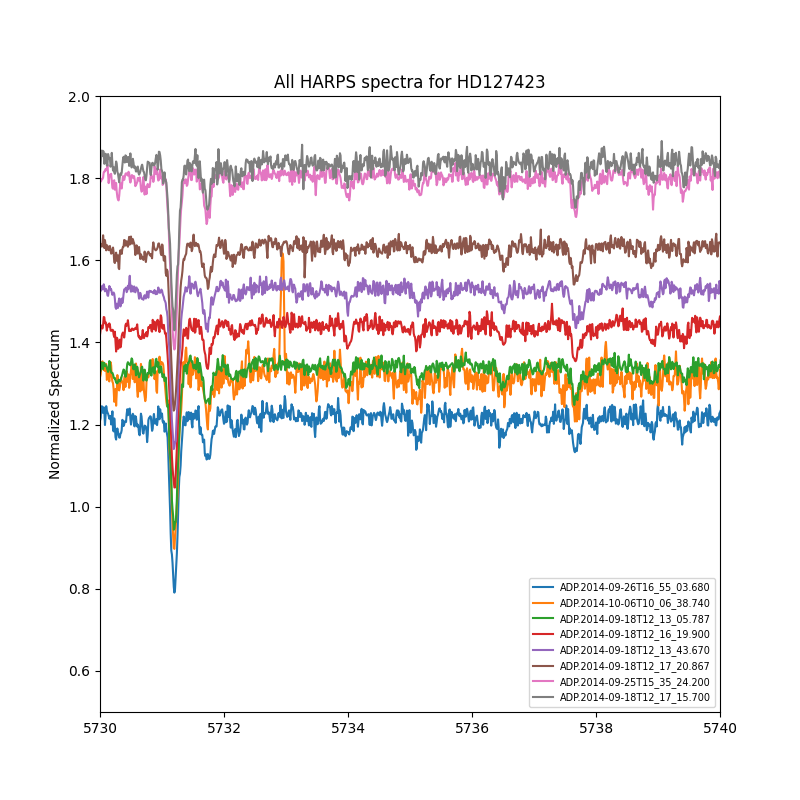

In [54]:
plt.figure(0)
plt.figure(0).set_size_inches(8,8)
plt.clf()
specfits = [fits.open(f) for f in fits_specfile_names]
wave = [f[1].data[0][0] for f in specfits]
arr1 = [f[1].data[0][1] for f in specfits]
norm_spec = [s/np.median(s) for s in arr1]

wavelim = [5730,5740]
for i in range(len(specfits)):
    plt.plot(wave[i],norm_spec[i]+i/10)
plt.xlim(wavelim)
plt.legend([f.stem for f in fits_specfile_names])
plt.title("All HARPS spectra for HD127423")
plt.ylabel("Normalized Spectrum")
plt.ylim([.5,2])
plt.show()


Other observations on 2013-06-01
--------------------------------
Query the ESO archive for all observations of different star taken an hour before to an hour after the candidate observation.

In [55]:
samenight_tbl = eso.query_surveys('HARPS',date_obs='2013-06-01T03:16:00..2013-06-01T05:16:00')
samenight_tbl.pprint()

          ARCFILE            Object  ... REFERENC
--------------------------- -------- ... --------
ADP.2014-10-06T10:04:23.740 HD107181 ...       --
ADP.2014-10-06T10:07:24.777 HD128356 ...       --
ADP.2014-10-06T10:04:46.673 HD126535 ...       --
ADP.2014-10-06T10:06:38.740 HD127423 ...       --
ADP.2014-10-06T10:04:27.593 HD143120 ...       --
ADP.2014-10-06T10:05:04.550 HD143361 ...       --
ADP.2014-10-06T10:04:15.887 HD144899 ...       --


In [56]:
specarcfile = samenight_tbl['ARCFILE']
fits_specfile_names = []
for file in specarcfile:
    fits_specfile_name = cached_filename(file)
    fits_specfile_names.append(fits_specfile_name)
    if (not fits_specfile_name.exists()):
        print(str(fits_specfile_name)+" to be downloaded")
        eso.retrieve_data(file)
    else:
        print(str(fits_specfile_name)+" exists")

C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_04_23.740.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_07_24.777.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_04_46.673.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_06_38.740.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_04_27.593.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_05_04.550.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_04_15.887.fits exists


In [57]:
radvel = []
for f in fits_specfile_names:
    fitsfile = fits.open(f)
    radvel.append(fitsfile[0].header["HIERARCH ESO TEL TARG RADVEL"])
print(radvel)

[63.0, 40.0, -19.9, -29.8, -23.6, -1.5, -2.5]


Plot the spectra for each star.  Emission lines near the target wavelength of 5733 angstroms are seen in several spectra.  Plot in both the spectrum's default reference frame and in the stars' doppler-shifted frame.  Absorption lines line up in the stars' reference frame but the emission lines do not, indicating that the emission is not coming from the stars.

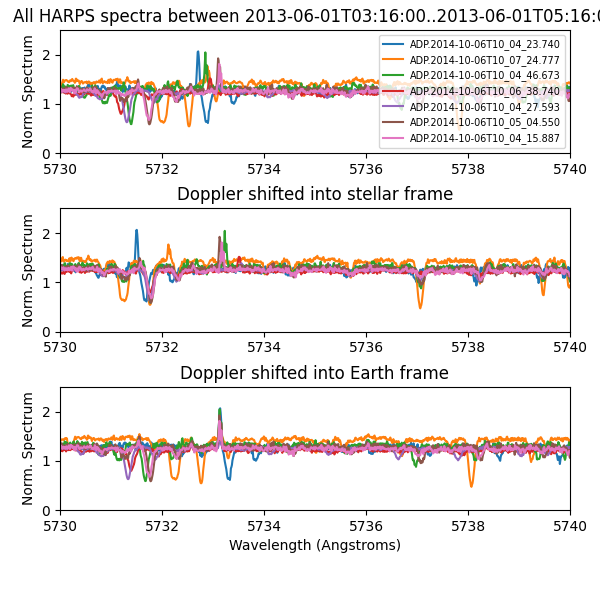

In [61]:
plt.figure(1)
plt.figure(1).set_size_inches(6,6)
plt.clf()
specfits = [fits.open(f) for f in fits_specfile_names]
radvels = [f[0].header["HIERARCH ESO TEL TARG RADVEL"] for f in specfits]
berv    = [f[0].header["HIERARCH ESO DRS BERV"] for f in specfits]
wave = [f[1].data[0][0] for f in specfits]
arr1 = [f[1].data[0][1] for f in specfits]
norm_spec = [s/np.median(s) for s in arr1]

wavelim = [5730,5740]
plt.subplot(3,1,1)
for i in range(len(specfits)):
    plt.plot(wave[i],norm_spec[i],label=fits_specfile_names[i].stem)
plt.xlim(wavelim)
plt.ylim([0,2.5])
plt.legend(loc='right')
plt.title("All HARPS spectra between 2013-06-01T03:16:00..2013-06-01T05:16:00")
plt.ylabel("Norm. Spectrum")
topax = plt.gca()
plt.subplot(3,1,2,sharex=topax,sharey=topax)
for i in range(len(specfits)):
    plt.plot(doppler(wave[i],radvels[i]),norm_spec[i],label=fits_specfile_names[i].stem)
plt.xlim(wavelim)
plt.ylim([0,2.5])
plt.title('Doppler shifted into stellar frame')
plt.ylabel("Norm. Spectrum")
plt.subplot(3,1,3,sharex=topax,sharey=topax)
for i in range(len(specfits)):
    plt.plot(doppler(wave[i],berv[i]),norm_spec[i],label=fits_specfile_names[i].stem)
plt.xlim(wavelim)
plt.ylim([0,2.5])
plt.title('Doppler shifted into Earth frame')
plt.ylabel("Norm. Spectrum")
plt.xlabel("Wavelength (Angstroms)")
plt.subplots_adjust(left = .1, right = .95, bottom = .15, top = .95, hspace=.45)
mpl.rcParams['legend.fontsize']='x-small'
mpl.rcParams['legend.fontsize']='x-small'

plt.show()


Now, download the CCD images for these spectra if necessary:

In [59]:
fits_rawfile_names = []
for file in fits_specfile_names:
    fitsobj = fits.open(file)
    fits_rawfile_name = cached_filename(fitsobj[0].header['PROV1'][:-5])
    fits_rawfile_names.append(fits_rawfile_name)
    if fits_rawfile_name.exists():
        print(str(fits_rawfile_name)+" exists")
    else:
        print(str(fits_rawfile_name)+" to be downloaded")
        harpscompare.download_associated_raw(file,decompress=True)

C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-06-01T03_21_31.499.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-06-01T03_38_50.000.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-06-01T03_58_57.602.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-06-01T04_16_19.375.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-06-01T04_33_53.818.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-06-01T04_50_24.767.fits exists
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-06-01T05_08_40.802.fits exists


Show raw CCD images of each of the observations near the wavelength of interest.  We see that the absorption features in the starlight move around depending on the star's relative velocity.  We see a bright emission feature in *all* of the observations at the target wavelength of 5733 angstroms (middle right of each panel) that does not move with respect to the calibration lamp spectrum above it.  While our OSETI algorith did not detect them, these features were present for at least several hours, and are stationary with respect to the telescope, indicating a ground-based terrestrial source.

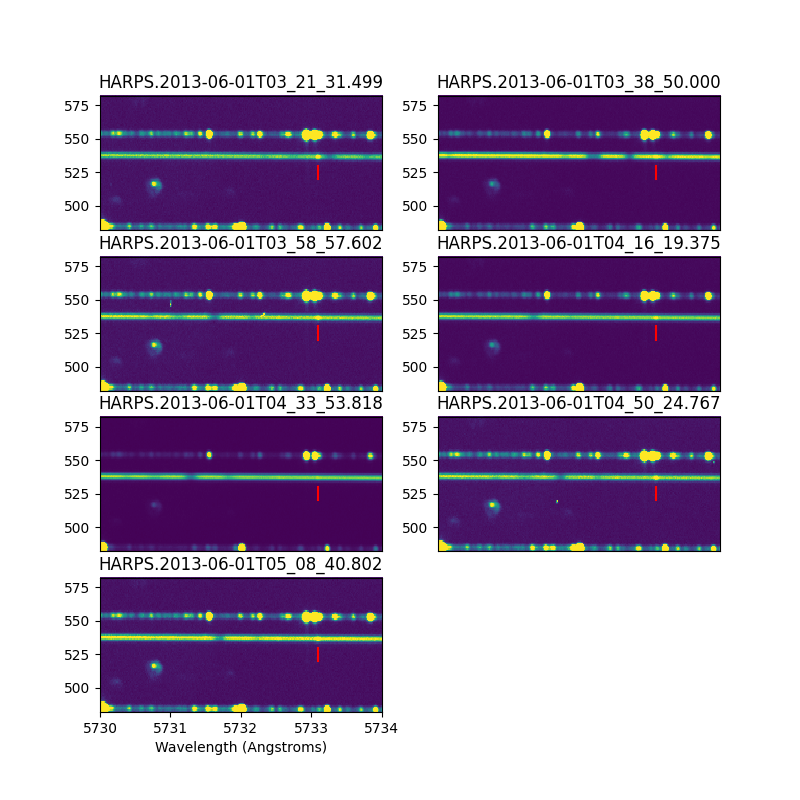

In [60]:
plt.figure(2) 
plt.figure(2).set_size_inches(8,8)
plt.clf()
lamb_range = [573,573.4]
countmaxes = [500,1000,500,1000,3000,500,500] # Vary color limits to match different observations
for i in range(len(fits_rawfile_names)):
    plt.subplot(4,2,i+1)
    harpscompare.plot_raw_image(fits_specfile_names[i],fits_rawfile_names[i],lamb=573.31,lamb_range=lamb_range,countmin=0,countmax=countmaxes[i])
    plt.title(fits_rawfile_names[i].stem)
    if (i<6):
        plt.xlabel("")
        plt.xticks([])
    else:
        plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter("%d")) # Integer x axis labels
    plt.plot([5733.09, 5733.09],[520,530],'r')
plt.show()